## Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.6, 7.0)

In [2]:
def generate_data(num_samples = 500):
    np.random.seed(1024)
    def true_relationship(x):
        return 2.5*x + 3
    
    x = np.linspace(-10, 10, num=num_samples)
    y = np.zeros(num_samples)
    for i in range(num_samples):
        y[i] = true_relationship(x[i]) + np.random.normal(0, 3.5)
    return x, y
        

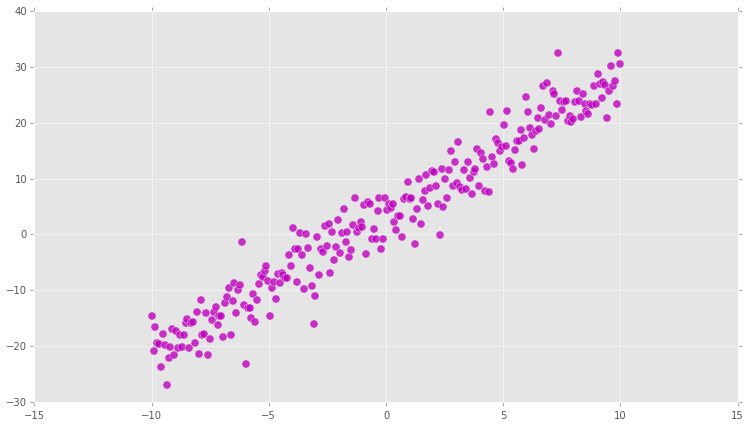

In [4]:
X_data, y_data = generate_data(250)
plt.scatter(X_data, y_data, s=65, alpha=0.8, c='m')
plt.show()

In [5]:
W = tf.Variable(0.0, name="W")
b = tf.Variable(0.0, name="b")

X = tf.placeholder("float")
Y = tf.placeholder("float")
no_of_samples = X_data.shape[0]


In [ ]:
activation = tf.add(tf.mul(X, W), b) #linear
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*no_of_samples)
optimizer = tf.train.GradientDescentOptimizer(0.08).minimize(cost)

no_of_epochs = 250
progress_print_limit = 25

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for i in range(no_of_epochs):
        for (x, y) in zip(X_data, y_data):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if i % progress_print_limit == 0:
            ctr_cost = sess.run(cost, feed_dict={X: X_data, Y:y_data})
            print "epoch: %d  cost: %f" %(i, ctr_cost)

    print "\nOptimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: X_data, Y: y_data}), "W=", sess.run(W), "b=", sess.run(b)

    plt.scatter(X_data, y_data, s=65, alpha=0.8, c='m', label='Training data points')
    plt.plot(X_data, sess.run(W) * X_data + sess.run(b), label='Fitted line', ls='--', lw=2)    
    plt.legend()
    plt.show()


epoch: 0  cost: 11.030841
epoch: 25  cost: 5.996051
epoch: 50  cost: 5.854342